In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t1ok-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t1ok-images-idx1-ubyte.gz

--2019-12-26 22:03:57--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.90
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.90|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  16.7MB/s    in 1.5s    

2019-12-26 22:03:59 (16.7 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-12-26 22:04:00--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.90
Connecting to fashion-mnist.s3-website.eu-central-1.amazona

In [15]:
!mkdir MNIST_Fashions
! cp *.gz MNIST_Fashions/
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_Fashions/")

Extracting MNIST_Fashions/train-images-idx3-ubyte.gz
Extracting MNIST_Fashions/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_Fashions/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_Fashions/t10k-labels-idx1-ubyte.gz


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.627451   0.42352945 0.454902
 0.70980394 0.4784314  0.78823537 0.6039216  0.61960787 0.34509805
 0.2784314  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.3137255  0.8078432  0.72156864 0.86274517 0.6392157
 0.9058824  0.7843138  0.8000001  0.6862745  0.75294125 0.20784315
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.3647059
 0.9568628  0.75294125 0.7490196  0.7960785  0.7176471  0.7137255
 0.7411765  0.74509805 0.854902   0.28235295 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.38431376 0.8745099  0.73333335
 0.77

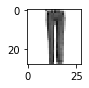

In [16]:
plt.figure(figsize=(1,1))
sample_image = mnist.train.next_batch(1)[0]
print(sample_image[0])

sample_image=sample_image.reshape([28,28])
plt.imshow(sample_image,cmap='Greys')

In [0]:
# Training parameters

learning_rate=0.0002
batch_size=128
epochs=100000

# Network parameters
image_dim=784                       #image size 28x28
gen_hidd_dim=256
disc_hidd_dim=256
z_noise_dim=100                      # input noise datapoint


def xavier_init(shape):
  return tf.random_normal(shape= shape,stddev=1./tf.sqrt(shape[0]/2.0))
  

In [0]:
# define weights and bias dictionaries
weights={ "disc_H"  :tf.Variable(xavier_init([image_dim,disc_hidd_dim])),
          "disc_final" :tf.Variable(xavier_init([disc_hidd_dim,1])),
          "gen_H"      :tf.Variable(xavier_init([z_noise_dim,gen_hidd_dim])),
           "gen_final" :tf.Variable(xavier_init([gen_hidd_dim,image_dim]))
        }

bias=   { "disc_H"  :tf.Variable(xavier_init([disc_hidd_dim])),
           "disc_final" :tf.Variable(xavier_init([1])), 
          "gen_H"      :tf.Variable(xavier_init([gen_hidd_dim])),
           "gen_final" :tf.Variable(xavier_init([image_dim]))     
        }

In [0]:
 #Creating the computational graph

#define Discriminator function

def Discriminator(x):
  hidden_layer=tf.nn.relu(tf.add(tf.matmul(x,weights["disc_H"]),bias["disc_H"]))
  final_layer =tf.add(tf.matmul(hidden_layer,weights["disc_final"]),bias["disc_final"])
  disc_output=tf.nn.sigmoid(final_layer)
  return final_layer,disc_output

#define Generator network

def Generator(x):
  hidden_layer=tf.nn.relu(tf.add(tf.matmul(x,weights["gen_H"]),bias["gen_H"]))
  final_layer =tf.add(tf.matmul(hidden_layer,weights["gen_final"]),bias["gen_final"])
  gen_output=tf.nn.sigmoid(final_layer)
  return gen_output

#define the placeholders for External input

z_input= tf.placeholder(tf.float32,shape=[None,z_noise_dim],name="input_noise")
x_input= tf.placeholder(tf.float32,shape=[None,image_dim],name="real_input")

# Building the Generator Network
with tf.name_scope("Generator") as scope:
    output_Gen=Generator(z_input)

# Building the Discriminator Network
with tf.name_scope("Discriminator") as scope:
   real_output1_Disc, real_output_Disc=Discriminator(x_input)          #implements D(x)
   fake_output1_Disc, fake_output_Disc=Discriminator(output_Gen)       # implements D(G(x))




In [0]:
# First kind of loss

with tf.name_scope("Discriminator_Loss") as scope:
  Discriminator_Loss=-tf.reduce_mean(tf.log(real_output_Disc + 0.0001) + tf.log(1.-fake_output_Disc + 0.0001))

with tf.name_scope("Generator_Loss") as scope:
  Generator_Loss=-tf.reduce_mean(tf.log(fake_output_Disc + 0.0001))

# Tensorboard summary
Disc_loss_total=tf.summary.scalar("Disc_Total_loss",Discriminator_Loss)
Gen_loss_total=tf.summary.scalar("Gen_Loss",Generator_Loss)


In [0]:
# Define the variables
Generator_var=[weights["gen_H"],weights["gen_final"],bias["gen_H"],bias["gen_final"]]
Discriminator_var=[weights["disc_H"],weights["disc_final"],bias["disc_H"],bias["disc_final"]]

#define the optimizer
with tf.name_scope("Optimizer_Discriminator") as scope:
  Discriminator_optimize=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(Discriminator_Loss,var_list=Discriminator_var)

with tf.name_scope("Optimizer_Generator") as scope:
  Generator_optimize=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(Generator_Loss,var_list=Generator_var)
  


In [22]:
# Initialize the Variables
init=tf.global_variables_initializer()

sess=tf.Session()
sess.run(init)
writer=tf.summary.FileWriter("./log",sess.graph)

for epoch in range(epochs):
  x_batch,_=mnist.train.next_batch(batch_size)

  #Generator noise to feed the discriminator
  z_noise=np.random.uniform(-1.,1.,size=[batch_size,z_noise_dim])
  _, Disc_loss_epoch=sess.run([Discriminator_optimize,Discriminator_Loss],feed_dict={x_input:x_batch,z_input:z_noise})
  _, Gen_loss_epoch=sess.run([Generator_optimize,Generator_Loss],feed_dict={z_input:z_noise})

  #Running the Discriminator summary
  summary_Disc_Loss=sess.run(Disc_loss_total,feed_dict={x_input:x_batch,z_input:z_noise})
  #Adding the Discriminator summary
  writer.add_summary(summary_Disc_Loss,epoch)

  #Running the Generator summary
  summary_Gen_Loss=sess.run(Gen_loss_total,feed_dict={z_input:z_noise})
  #Adding the Generator summary
  writer.add_summary(summary_Gen_Loss,epoch)

  if epoch % 2000 == 0:
    print("Steps :{0} :Generator Loss:{1},Discriminator Loss : {2}".format(epoch,Gen_loss_epoch,Disc_loss_epoch)) 

Steps :0 :Generator Loss:2.1934854984283447,Discriminator Loss : 2.3275370597839355
Steps :2000 :Generator Loss:4.711066246032715,Discriminator Loss : 0.027341142296791077
Steps :4000 :Generator Loss:2.804594039916992,Discriminator Loss : 0.20030085742473602
Steps :6000 :Generator Loss:2.808011054992676,Discriminator Loss : 0.29261094331741333
Steps :8000 :Generator Loss:2.4133219718933105,Discriminator Loss : 0.3275071382522583
Steps :10000 :Generator Loss:2.833071231842041,Discriminator Loss : 0.3078882396221161
Steps :12000 :Generator Loss:2.285050868988037,Discriminator Loss : 0.3886064887046814
Steps :14000 :Generator Loss:2.2419562339782715,Discriminator Loss : 0.5095335245132446
Steps :16000 :Generator Loss:2.171544313430786,Discriminator Loss : 0.5210850238800049
Steps :18000 :Generator Loss:2.2705607414245605,Discriminator Loss : 0.7510054111480713
Steps :20000 :Generator Loss:2.408770799636841,Discriminator Loss : 0.5210355520248413
Steps :22000 :Generator Loss:2.395066738128

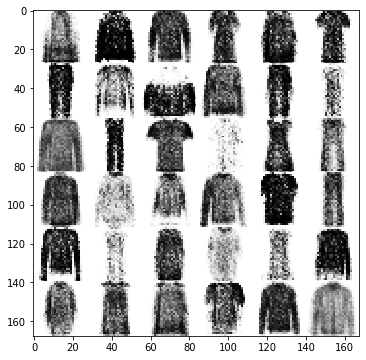

In [23]:
# Testing 
# Generative images from noise,using the generator network.
n=6
canvas = np.empty((28*n,28*n))
for i in range(n):
  #Noise input
  z_noise=np.random.uniform(-1.,1.,size=[batch_size,z_noise_dim])
  #Generative image from noise
  g=sess.run(output_Gen,feed_dict={z_input:z_noise})
  #Reverse colors for better display
  g=-1*(g-1)
  for j in range(n):
    # Draw the generated digits
    canvas[i*28:(i+1)*28,j*28:(j+1)*28]=g[j].reshape([28,28])

plt.figure(figsize=(n,n))
plt.imshow(canvas,origin="upper",cmap="gray")
plt.show()
